In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats
from pydataset import data

In [2]:
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


Null: Size two parties tip the same amount as any party in my dataset.

Alternative: Size two parties tip a different amount from any dataset.

In [3]:
#define population mean
overall_tip = df.tip.mean()
overall_tip

2.99827868852459

In [4]:
#define sample distribution
tip_for_two = df[df['size'] == 2].tip

In [5]:
t_two, p_two = stats.ttest_1samp(tip_for_two, overall_tip)
t_two, p_two

(-5.271912239283316, 4.4632473980137726e-07)

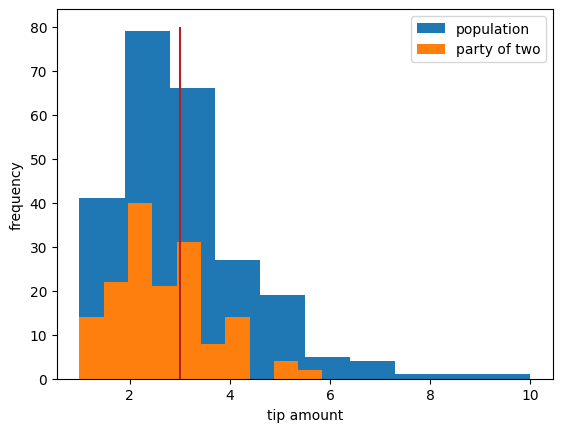

In [6]:
plt.hist(df.tip, label = 'population')
plt.hist(tip_for_two, label = 'party of two')
plt.vlines(overall_tip, 0, 80, color = 'firebrick')
plt.xlabel('tip amount')
plt.ylabel('frequency')
plt.legend()
plt.show()

In [7]:
a = 0.05

if p_two < a:
    print('We reject the null hypothesis')

else:
    print('we fail to reject the null hypothesis')

We reject the null hypothesis


Null hypothesis: Guests for dinner pay less than or the same amount as guests for lunch

Alternative hypothesis: Guests for dinner pay more than guests for lunch.

In [11]:
lunch_bills = df[df.time == 'Lunch'].total_bill

In [12]:
dinner_bills = df[df.time == 'Dinner'].total_bill

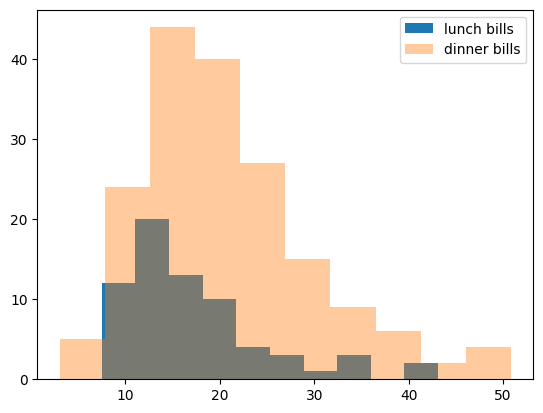

In [17]:
plt.hist(lunch_bills, label = 'lunch bills')
plt.hist(dinner_bills, label = 'dinner bills', alpha = 0.4)
plt.legend()
plt.show()

In [22]:
t_time, p_time = stats.ttest_ind(dinner_bills, lunch_bills)
t_time, p_time

(2.8976375218366424, 0.004104621407595676)

In [24]:
a < 0.05

if t_time > 0 and (p_time/2 < a):
    print('we reject the null hypothesis')

else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [27]:
stats.ttest_ind(lunch_bills, dinner_bills)

TtestResult(statistic=-2.8976375218366424, pvalue=0.004104621407595676, df=242.0)

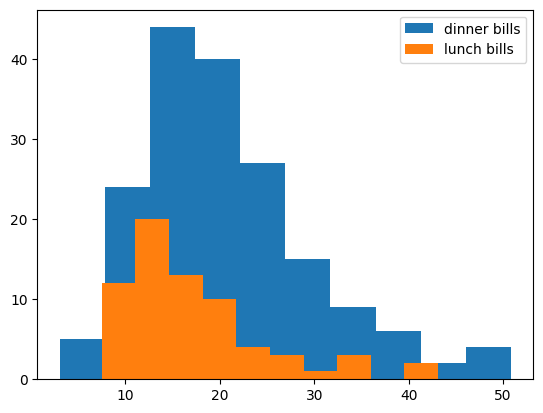

In [28]:
plt.hist(dinner_bills, label = 'dinner bills')
plt.hist(lunch_bills, label = 'lunch bills')
plt.legend()
plt.show()